In [11]:
from textblob import TextBlob
from textblob.sentiments import PatternAnalyzer
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_file = 'app/static/data/reviews.csv'

df = pd.read_csv(data_file, encoding='latin1')

# # Remove duplicates.
# df = df.loc[:599]




# def pattern_analyzer(text):
#     blob = TextBlob(text, analyzer=PatternAnalyzer())
#     if blob.sentiment[0] < 0:
#         return 0
#     elif blob.sentiment[0] > 0:
#         return 1

# def cust_sent(df):
#     reviews = df['review']
#     ratings = df['rating']
#     total = len(reviews)
#     pos = round((ratings[ratings>3].count() / total), 2)
#     neg = round((ratings[ratings<3].count() / total), 2)
#     pa = reviews.apply(pattern_analyzer)
#     pa_pos = round((pa[pa==1].count() / total), 2)
#     pa_neg = round((pa[pa==0].count() / total), 2)
#     return [pos, neg, pa_pos, pa_neg]

# # cust_sent(df)
# df

In [4]:
sentences = []
sentiment_df = pd.DataFrame(columns=['sentence', 'polarity', 'subjectivity'])

# Records the sentiments of an individual review.
def reviewPolarity(rev_blob):
    polarity = []
    for sentence in rev_blob.sentences:
        polarity.append(sentence.sentiment.polarity)
    polarity_array = np.array(polarity)
    mean = np.mean(polarity_array)
#     print(mean)
    return mean

    
def reviewSubjectivity(rev_blob):
    subjectivity = []
    for sentence in rev_blob.sentences:
        subjectivity.append(sentence.sentiment.subjectivity)
    subjectivity_array = np.array(subjectivity)
    mean = np.mean(subjectivity_array)
#     print(mean)
    return mean

sentiment_df

,sentence,polarity,subjectivity


In [13]:

def stringFromList(my_list):
    new_string = ' '.join(my_list)
    return new_string


def textLemmatizer(my_text):

    raw_words = nltk.word_tokenize(my_text)
    # Clean words
    words = [word for word in raw_words if len(word) > 1]
    words = [word for word in words if word.isalpha()]
    words = [w.lower() for w in words if w.isalnum()]
    # Stop words
    stopwords = set(nltk.corpus.stopwords.words('english'))
    # There are plenty of functions that allow us to modify the stopwords.
    words = [word for word in words if word not in stopwords]
    # Lemma or Stem; use Lemmatizer for better results
    wnl = nltk.WordNetLemmatizer()
    cleaned_words = [wnl.lemmatize(t) for t in words]
#     print(cleaned_words)
    return cleaned_words


df['cleaned words list'] = df['review'].apply(textLemmatizer)

df['cleaned words'] = df['cleaned words list'].apply(stringFromList)
df['reviewblob'] = df['cleaned words'].apply(TextBlob)

def reviewPolarity(rev_blob):
    polarity = []
    for sentence in rev_blob.sentences:
        polarity.append(sentence.sentiment.polarity)
    polarity_array = np.array(polarity)
    mean = np.mean(polarity_array)
#     print(mean)
    return mean

    
def reviewSubjectivity(rev_blob):
    subjectivity = []
    for sentence in rev_blob.sentences:
        subjectivity.append(sentence.sentiment.subjectivity)
    subjectivity_array = np.array(subjectivity)
    mean = np.mean(subjectivity_array)
#     print(mean)
    return mean



df['reviewblob'] = df['cleaned words'].apply(TextBlob)
df['subjectivity_score'] = df['reviewblob'].apply(reviewSubjectivity)
df['polarity_score'] = df['reviewblob'].apply(reviewPolarity)




### Plotting Sentiment

No handles with labels found to put in legend.


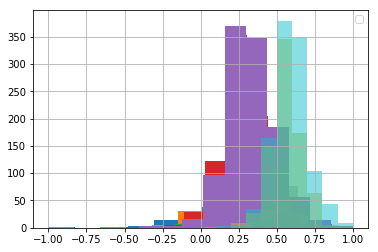

In [14]:
# First, get the df array and organize it by rating.



pol_rat_mean = df[df['name'] == 'Sassafras']



# .groupby(['rating'])['polarity_score'].mean()
sub_rat_mean = df.groupby(['rating'])['subjectivity_score'].mean()

# print(pol_rat_mean)
# print(sub_rat_mean)

pol_rat_hist = df.groupby(['rating'])['polarity_score'].hist()
df.groupby(['rating'])['subjectivity_score'].hist(alpha=0.5)
plt.legend()



# df = df.drop_duplicates()


### Show Reviews

In [63]:
# Function that displays all reviews with a certain name.

def show_reviews(rest_name):
    for reviews in df[df['name']== rest_name]['review']:
        print(reviews)
        
df.filter(items=['rating', 'review'])
    
# show_reviews('Sassafras')

,rating,review
0,5,Had a great time at Sassafras last night!! I h...
1,5,"Internet eaters, it is fair to say that this p..."
2,1,Hello! So first off I am not one to write revi...
3,5,Sassafras is a one of a kind restaurant. I sto...
4,3,Excited by a new vegetarian/vegan restaurant a...
5,2,"Good concept, poor execution. Famous seitan ri..."
6,4,Third time's the charm. I had the Big Mac and...
7,5,One of the best things about Eat At Jumbo's an...
8,5,"First of all, super awesome menu. Hard to find..."
9,5,Today was my first time here and this place ha...


rating
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: subjectivity_score, dtype: object

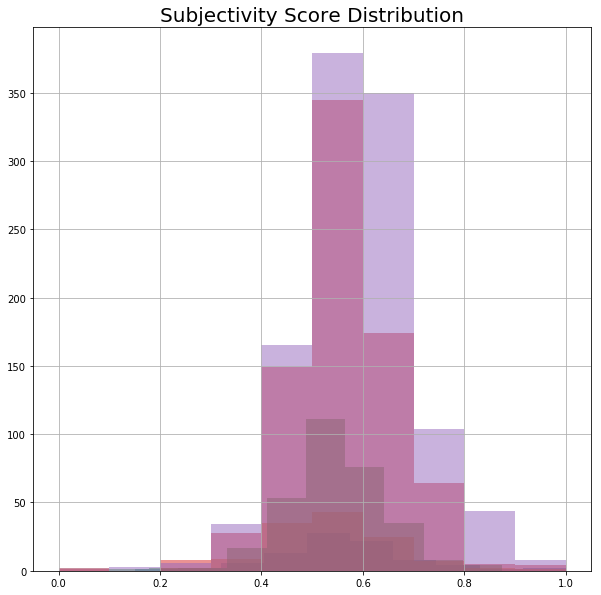

In [31]:
# import pygal
# from pygal.style import DarkSolarizedStyle
# from pygal import Config

def makeSentDF(my_df,filter=None):
    my_df['cleaned words list'] = my_df['review'].apply(textLemmatizer)
    my_df['cleaned words'] =my_df['cleaned words list'].apply(stringFromList)
    my_df['reviewblob'] =my_df['cleaned words'].apply(TextBlob)
    my_df['subjectivity_score'] = my_df['reviewblob'].apply(reviewSubjectivity)
    my_df['polarity_score'] =my_df['reviewblob'].apply(reviewPolarity)

    # self.df = self.df.drop(columns = ['Unnamed: 0','reviewblob', 'cleaned words', 'cleaned words list'])
    if filter != None:
        my_df = my_df[my_df['name'].str.match(filter)]

    return my_df



def plot_subjectivity_hist(review_dataframe):
    sentiment_df = makeSentDF(review_dataframe)
    
        
    fig,ax = plt.subplots(figsize=(10,10))
    subjectivity_hist = sentiment_df.groupby(['rating'])['subjectivity_score'].hist(alpha=0.5)

    plt.title("Subjectivity Score Distribution", fontsize=20)
    plt.xlabel=('Word Count')
    plt.ylabel=("Rating")
    return subjectivity_hist

plot_subjectivity_hist(df)
    
    

rating
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: polarity_score, dtype: object

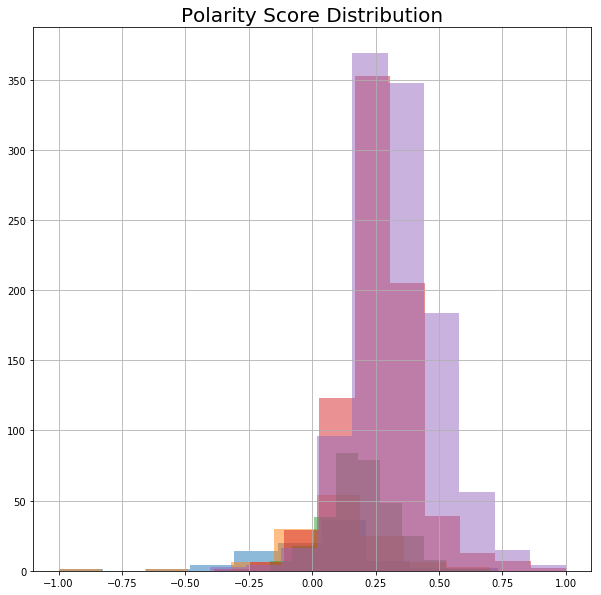

In [35]:
def plot_polarity_hist(review_dataframe):
    sentiment_df = makeSentDF(review_dataframe)
    
        
    fig,ax = plt.subplots(figsize=(10,10))
    polarity_hist = sentiment_df.groupby(['rating'])['polarity_score'].hist(alpha=0.5)


    plt.title("Polarity Score Distribution", fontsize=20)
    plt.xlabel=('Word Count')
    plt.ylabel=("Rating")
    return polarity_hist

plot_polarity_hist(df)

In [40]:
# Make Sentiment Tables

def make_subjectivity_table(review_dataframe):
    sentiment_df = makeSentDF(review_dataframe)
    filtered_df = sentiment_df.filter(items=['review', 'name', 'subjectivity_score'])
    return filtered_df

make_subjectivity_table(df)


def make_polarity_table(review_dataframe):
    sentiment_df = makeSentDF(review_dataframe)
    filtered_df = sentiment_df.filter(items=['review', 'name', 'polarity_score'])
    return filtered_df

make_polarity_table(df)

,review,name,polarity_score
0,Fantastic meal starting with warm pretzel roll...,Ocean Prime,0.487879
1,"Atmosphere: sophisticated, high energy, but al...",Ocean Prime,0.362979
2,Happy birthday to meeeeeeeee!!!This year was s...,Ocean Prime,0.399769
3,Our first time in Boston and wanted a nice din...,Ocean Prime,0.490000
4,"I won't tell you about the food, experience th...",Ocean Prime,0.150000
5,I went to Ocean Prime with a group of friends....,Ocean Prime,0.209876
6,Best place in Boston! Big variety of all kinds...,Ocean Prime,0.475000
7,Visited this location while in town for work. ...,Ocean Prime,0.258974
8,"Late dinner here with work friends, they were ...",Ocean Prime,0.431481
9,I'm honestly disappointed in ocean prime. Base...,Ocean Prime,0.053125
